In [9]:
import pandas as pd 

#Dataset codificado 
data = {
    "Fiebre_alta": [1,1,0,0,1],
    "Dolor_muscular":[1,1,0,1,0],
    "Congestion_nasal":[0,1,1,0,1],
    "Diagnostico":[1,1,0,0,1], #1=Gripe, 0=Resfriado
    "Duracion":[7,10,3,5,8]
}

df = pd.DataFrame(data)
#Se divide en dos partes: caracteristicas (x) y variable objetivo (y)
X = df.drop("Duracion", axis=1) #Caracteristicas .drop elimina la columna "Diagnostico", axis=1 indica que es una columna 
y = df["Duracion"]

print("Dataset original")
print(df)

Dataset original
   Fiebre_alta  Dolor_muscular  Congestion_nasal  Diagnostico  Duracion
0            1               1                 0            1         7
1            1               1                 1            1        10
2            0               0                 1            0         3
3            0               1                 0            0         5
4            1               0                 1            1         8


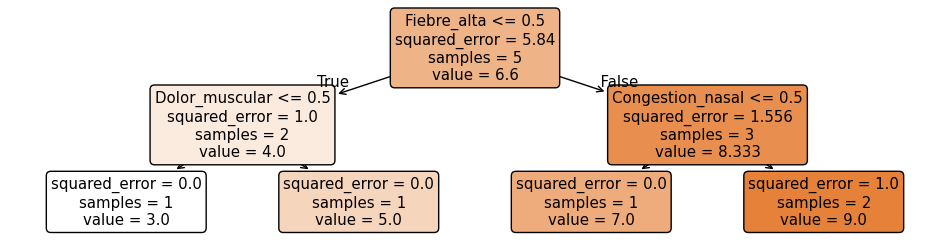

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

#Crear y entrenar el modelo 
model = DecisionTreeRegressor(criterion="squared_error",max_depth=2,random_state=42)
model.fit(X,y)

#Visualizar el arbol 
plt.figure(figsize=(12,3))
plot_tree(model,
          feature_names=X.columns,
          class_names=["Resfriado","Gripe"],
          filled = True,
          rounded=True)
plt.show()

In [12]:
#Prececir un nuevo paciente: Fiebre=No(0), Dolor=No(0), Congestión=Sí(1)
nuevo_paciente=pd.DataFrame([[0,0,1,0]],columns=X.columns)
prediccion= model.predict(nuevo_paciente)
if prediccion[0]==1:
    print("Diagnóstico: Gripe")
else:
    print("Diagnóstico: Resfriado")

Diagnóstico: Resfriado


In [14]:
#Predecir para un nuevo paciente: fiebre=1, Dolor=0, Congestion=1
nuevo_paciente=pd.DataFrame([[1,0,1,0]],columns=X.columns)
prediccion= model.predict(nuevo_paciente)
print("Duración predicha: {prediccion[0]:.1f} dias")

Duración predicha: {prediccion[0]:.1f} dias
